In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-deadlock.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
weight_df = pd.DataFrame(
    [
        ["train", population, lb, w]
        for (population, lb, t), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", population, lb, w]
        for (population, lb, t), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "population", "lookback", "weight"],
)

weight_df

,phase,population,lookback,weight
0,train,16,3,0.465891
1,train,16,3,0.627599
2,train,16,3,0.462148
3,train,16,3,0.435602
4,train,16,3,0.411647
...,...,...,...,...
10415995,test,256,2,0.666667
10415996,test,256,2,0.597403
10415997,test,256,2,0.653846
10415998,test,256,2,0.420000


(0.0, 1.0)

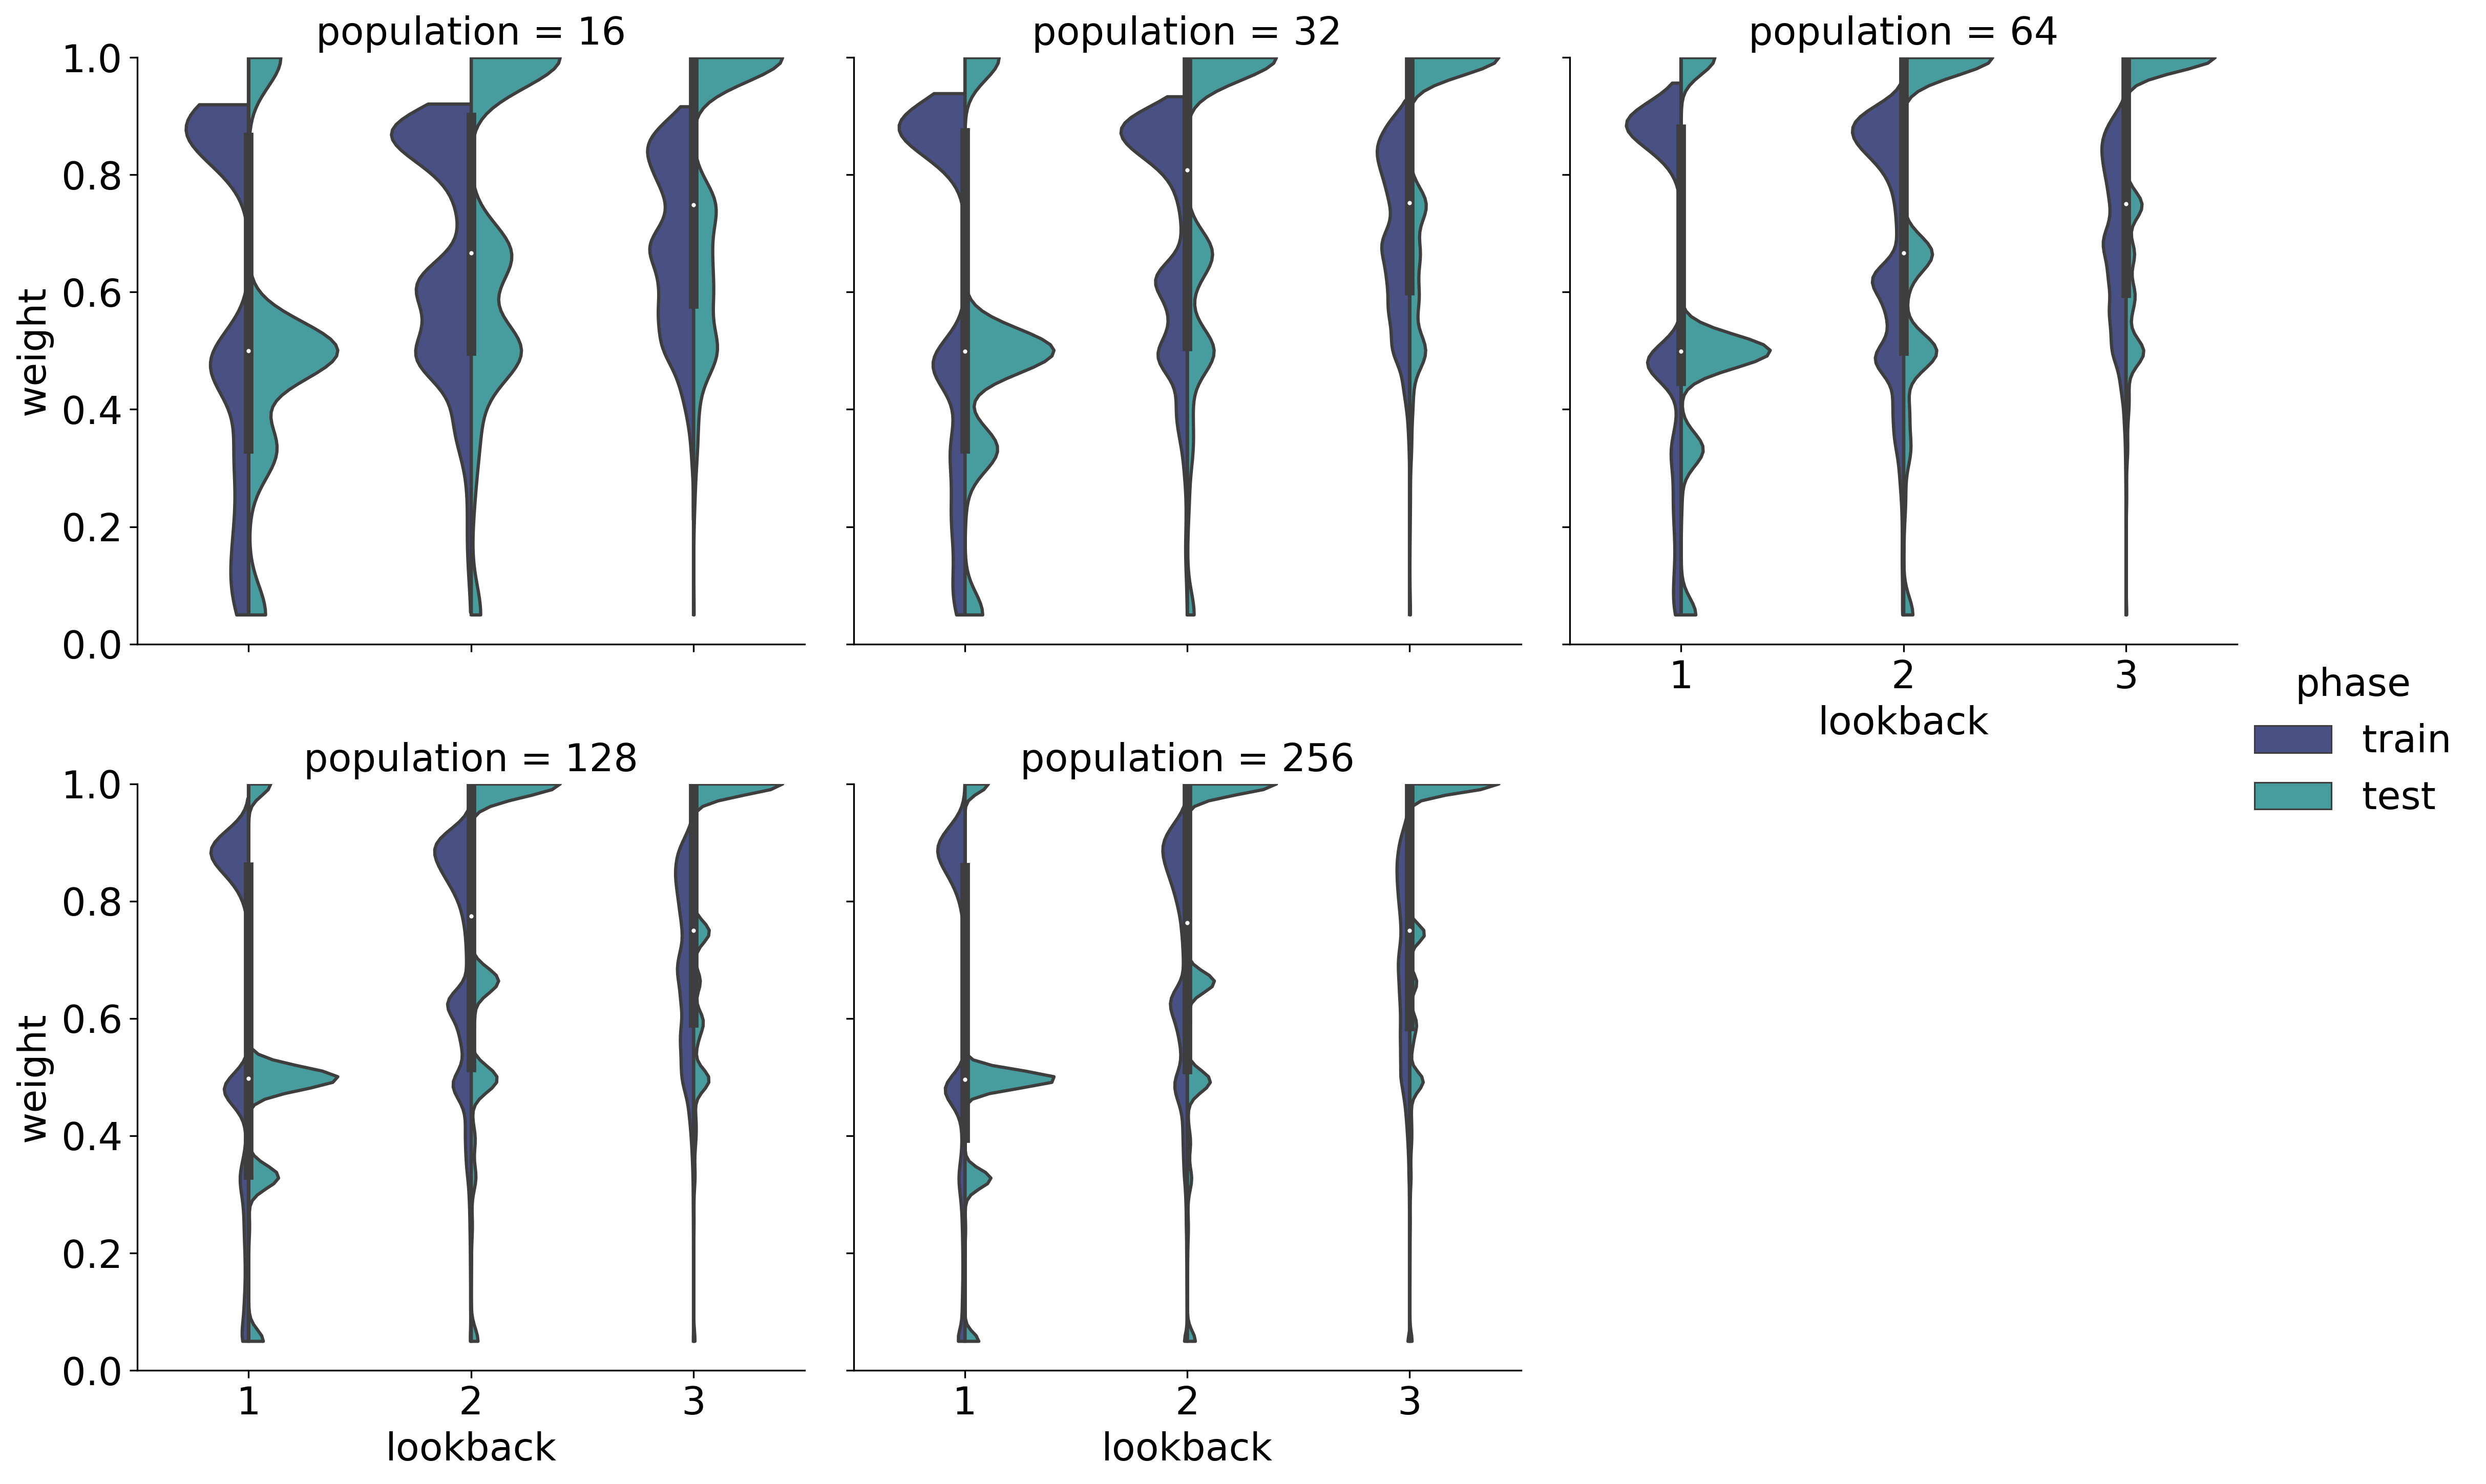

In [4]:
sns.catplot(
    data=weight_df,
    x="lookback",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="violin",
    cut=0,
    split=True,
)

plt.ylim(0.0, 1.0)

In [5]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,16,3,1.232862
1,train,16,3,1.161112
2,train,16,3,1.184431
3,train,16,3,1.195481
4,train,16,3,1.158625
...,...,...,...,...
595,test,256,2,1.098047
596,test,256,2,1.097353
597,test,256,2,1.090131
598,test,256,2,1.099922


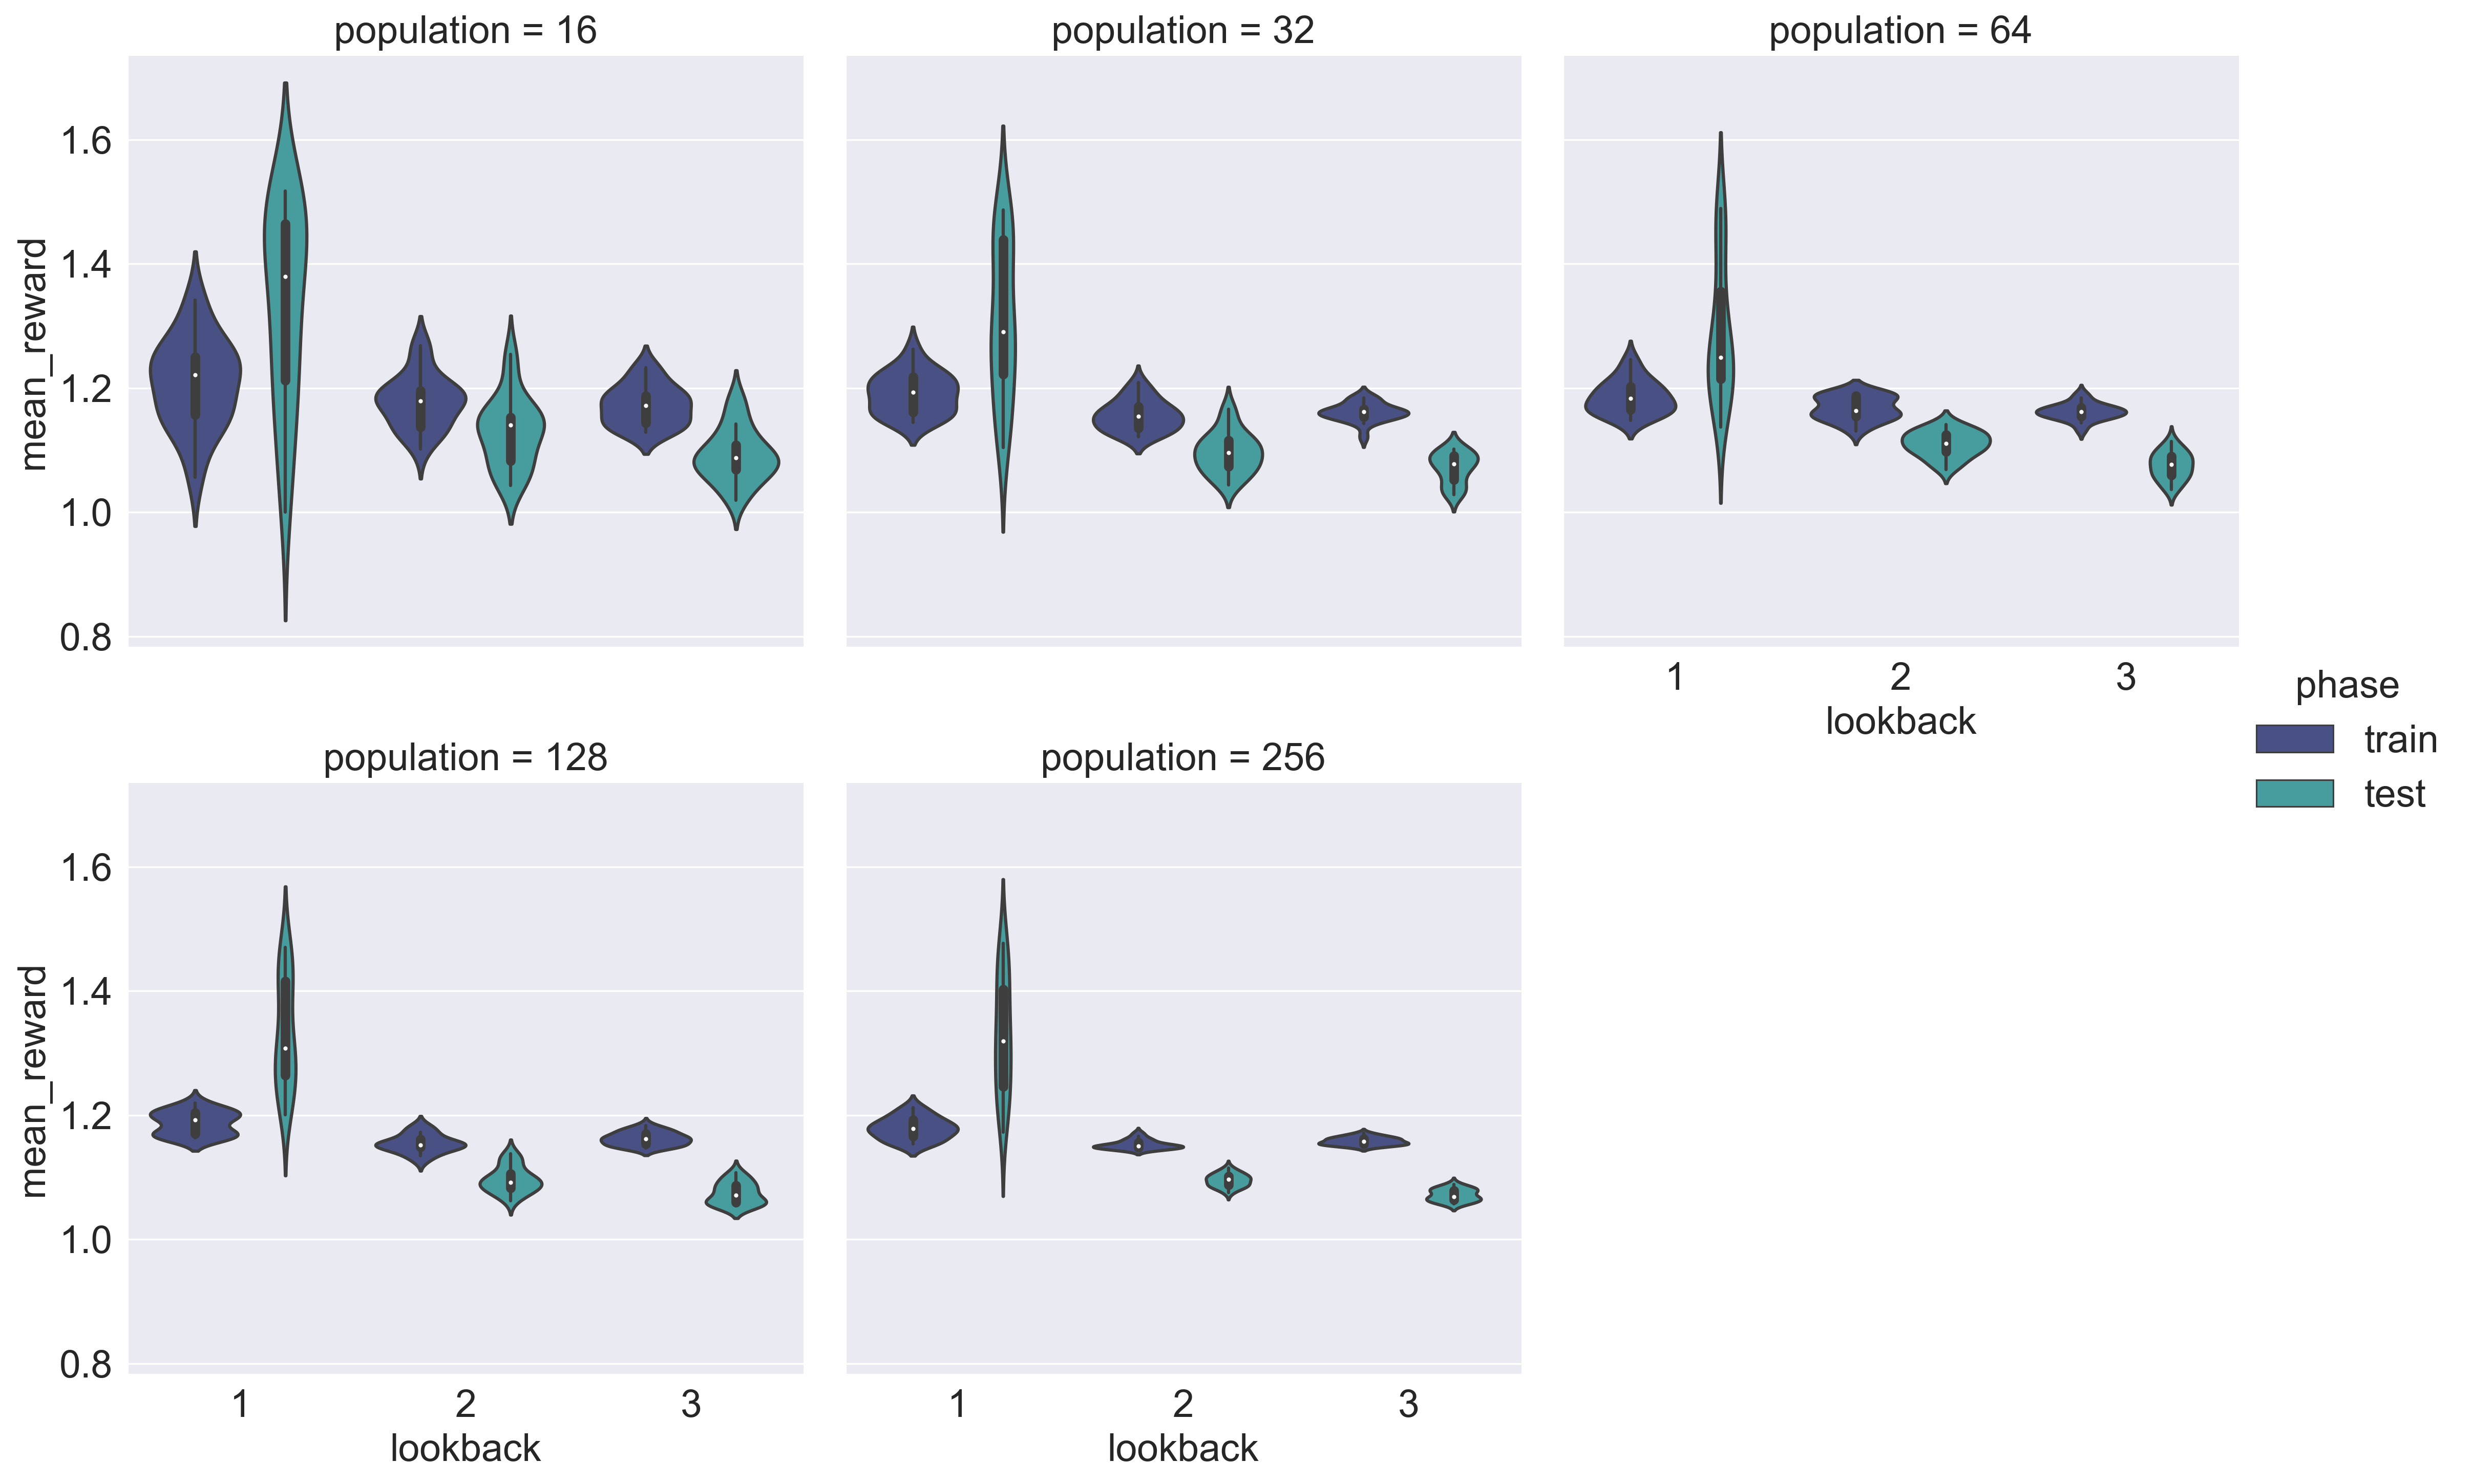

In [6]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=3,
    hue="phase",
    palette="mako",
    kind="violin",
)

In [7]:
agg_df = reward_df.groupby(["phase", "population", "lookback"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                 mean       std
phase population lookback                      
test  16         1           1.332192  0.158533
                 2           1.129286  0.056531
                 3           1.091053  0.042522
      32         1           1.307424  0.123300
                 2           1.095929  0.032905
                 3           1.071501  0.024842
      64         1           1.288711  0.111624
                 2           1.110235  0.020488
                 3           1.074918  0.021974
      128        1           1.331538  0.088975
                 2           1.096347  0.020682
                 3           1.073983  0.017609
      256        1           1.328780  0.093796
                 2           1.095151  0.010414
                 3           1.071565  0.009680
train 16         1           1.207757  0.071333
                 2           1.178991  0.043005
                 3           1.171945  0.032046
      32         1           1.191088  0.032837
                 2           1.155827  0.024661
                 3           1.161109  0.014918
      64         1           1.185181  0.026934
                 2           1.167657  0.019080
                 3           1.162085  0.013133
      128        1           1.187509  0.018774
                 2           1.154465  0.014529
                 3           1.162344  0.010728
      256        1           1.178893  0.017608
                 2           1.152910  0.007256
                 3           1.158464  0.006153

In [8]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_24368/913573291.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "population"], columns="lookback").reset_index()


phase population mean_reward                                \
                                  mean                           std   
lookback                             1         2         3         1   
0          test         16    1.332192  1.129286  1.091053  0.158533   
1          test         32    1.307424  1.095929  1.071501  0.123300   
2          test         64    1.288711  1.110235  1.074918  0.111624   
3          test        128    1.331538  1.096347  1.073983  0.088975   
4          test        256    1.328780  1.095151  1.071565  0.093796   
5         train         16    1.207757  1.178991  1.171945  0.071333   
6         train         32    1.191088  1.155827  1.161109  0.032837   
7         train         64    1.185181  1.167657  1.162085  0.026934   
8         train        128    1.187509  1.154465  1.162344  0.018774   
9         train        256    1.178893  1.152910  1.158464  0.017608   

                              
                              
lookback         2         3  
0         0.056531  0.042522  
1         0.032905  0.024842  
2         0.020488  0.021974  
3         0.020682  0.017609  
4         0.010414  0.009680  
5         0.043005  0.032046  
6         0.024661  0.014918  
7         0.019080  0.013133  
8         0.014529  0.010728  
9         0.007256  0.006153

In [9]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$1.208 \pm 0.071$	&	$1.179 \pm 0.043$	&	$1.172 \pm 0.032$ \\
32	&	$1.191 \pm 0.033$	&	$1.156 \pm 0.025$	&	$1.161 \pm 0.015$ \\
64	&	$1.185 \pm 0.027$	&	$1.168 \pm 0.019$	&	$1.162 \pm 0.013$ \\
128	&	$1.188 \pm 0.019$	&	$1.154 \pm 0.015$	&	$1.162 \pm 0.011$ \\
256	&	$1.179 \pm 0.018$	&	$1.153 \pm 0.007$	&	$1.158 \pm 0.006$ \\


In [10]:
for _, row in pivoted_df[pivoted_df["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$1.332 \pm 0.159$	&	$1.129 \pm 0.057$	&	$1.091 \pm 0.043$ \\
32	&	$1.307 \pm 0.123$	&	$1.096 \pm 0.033$	&	$1.072 \pm 0.025$ \\
64	&	$1.289 \pm 0.112$	&	$1.110 \pm 0.020$	&	$1.075 \pm 0.022$ \\
128	&	$1.332 \pm 0.089$	&	$1.096 \pm 0.021$	&	$1.074 \pm 0.018$ \\
256	&	$1.329 \pm 0.094$	&	$1.095 \pm 0.010$	&	$1.072 \pm 0.010$ \\
